<a href="https://colab.research.google.com/github/mehmetakifkucukkaya/MachineLearning_Diabet/blob/main/MachineLearnign_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NAİVE BAYES

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,  roc_auc_score


# Veri setini yükleyoruz
veri_seti = pd.read_csv("veri_seti.csv")

# Özellikler ve hedef değişkeni ayırıyoruz
X = veri_seti.drop(columns=['Class variable (0 or 1)'])
y = veri_seti['Class variable (0 or 1)']

# Veri setini  eğitim (%70), test (%30) olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Sınıflandırıcısı kullanalım
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_predictions = naive_bayes.predict(X_test)
print("Naive Bayes Results:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))


# Confusion matrix hesaplama işlemi
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

# Accuracy
nb_accuracy = nb_conf_matrix.diagonal().sum() / nb_conf_matrix.sum()

# Sensitivity
nb_sensitivity = nb_conf_matrix[1, 1] / (nb_conf_matrix[1, 1] + nb_conf_matrix[1, 0])

# Specificity
nb_specificity = nb_conf_matrix[0, 0] / (nb_conf_matrix[0, 0] + nb_conf_matrix[0, 1])

# ROC AUC
nb_roc_auc = roc_auc_score(y_test, nb_predictions)


print("\nNaive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Sensitivity:", nb_sensitivity)
print("Naive Bayes Specificity:", nb_specificity)
print("Naive Bayes ROC AUC Score:", nb_roc_auc)


Naive Bayes Results:
[[119  32]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231


Naive Bayes Accuracy: 0.7445887445887446
Naive Bayes Sensitivity: 0.6625
Naive Bayes Specificity: 0.7880794701986755
Naive Bayes ROC AUC Score: 0.7252897350993377


In [ ]:
# Normalizasyon işlemi

# Min-Max normalizasyonu için scaler oluşturma
scaler = MinMaxScaler()

# Özellikleri normalleştirme
X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print(X_normalized_df.head())

   Number of times pregnant  \
0                  0.352941   
1                  0.058824   
2                  0.470588   
3                  0.058824   
4                  0.000000   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                           0.743719                          
1                                           0.427136                          
2                                           0.919598                          
3                                           0.447236                          
4                                           0.688442                          

   Diastolic blood pressure (mm Hg)  Triceps skinfold thickness (mm)  \
0                          0.590164                         0.353535   
1                          0.540984                         0.292929   
2                          0.524590                         0.000000   
3                          0.540984               

En iyi K değeri: 49 => 0.7532467532467533


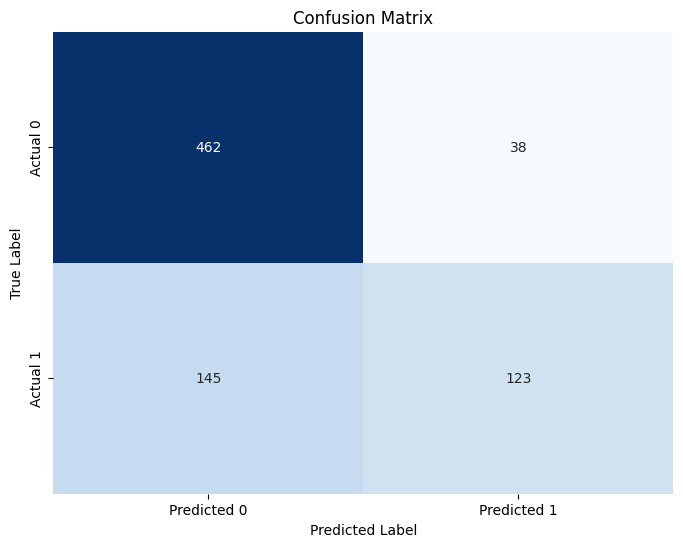


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       500
           1       0.76      0.46      0.57       268

    accuracy                           0.76       768
   macro avg       0.76      0.69      0.70       768
weighted avg       0.76      0.76      0.74       768

Specificity: 0.924
Sensitivity: 0.458955223880597
ROC AUC: 0.6914776119402984


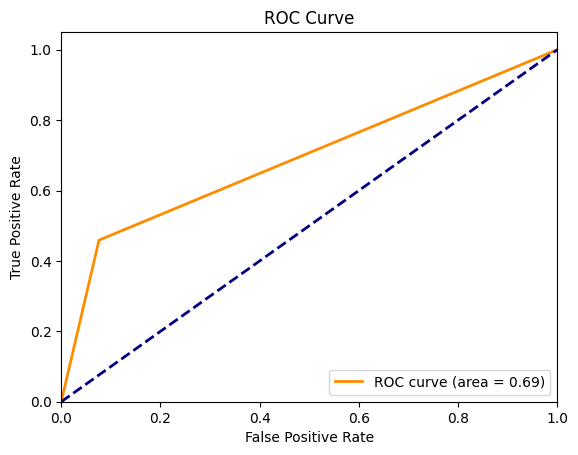

In [ ]:
# K-En Yakın Komşuluk Sınıflandırıcısı için K değerlerini belirleme

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

k_values = range(1,100)
best_k = None
best_accuracy = 0

# Her bir K değeri için K-NN modelini eğitme ve değerlendirme
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"En iyi K değeri: {best_k} => {best_accuracy}")

# Elde Edilen K değerş ile modelimizi eğitelim
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_normalized_df, y)

# Eğitilmiş modelle test setini değerlendirme
y_pred = best_knn.predict(X_normalized_df)

# ------------ CONFUSİON MATRİX -------------
conf_matrix = confusion_matrix(y, y_pred)

# Confusion Matrix'in tablosu
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Sınıflandırma raporu
class_report = classification_report(y, y_pred)
print("\nClassification Report:")
print(class_report)

# METRİKLER

# Specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f"Specificity: {specificity}")

# Sensitivity
recall = recall_score(y, y_pred)
print(f"Sensitivity: {recall}")

# ROC AUC
roc_auc = roc_auc_score(y, y_pred)
print(f"ROC AUC: {roc_auc}")


# ROC eğrisi
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdirme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


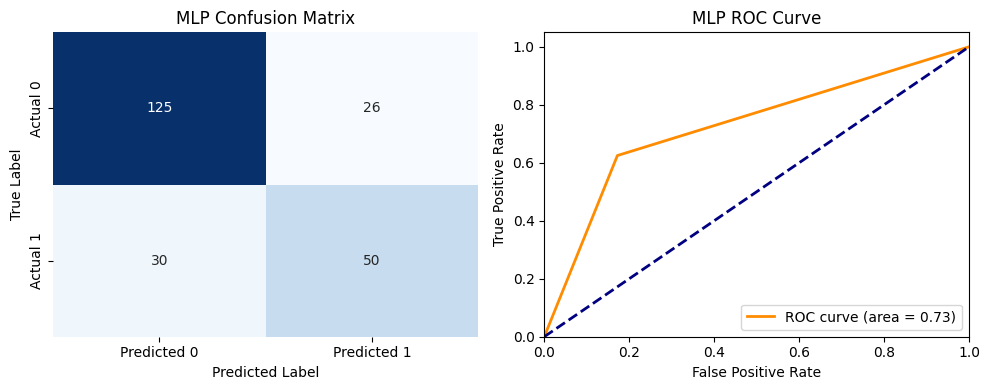

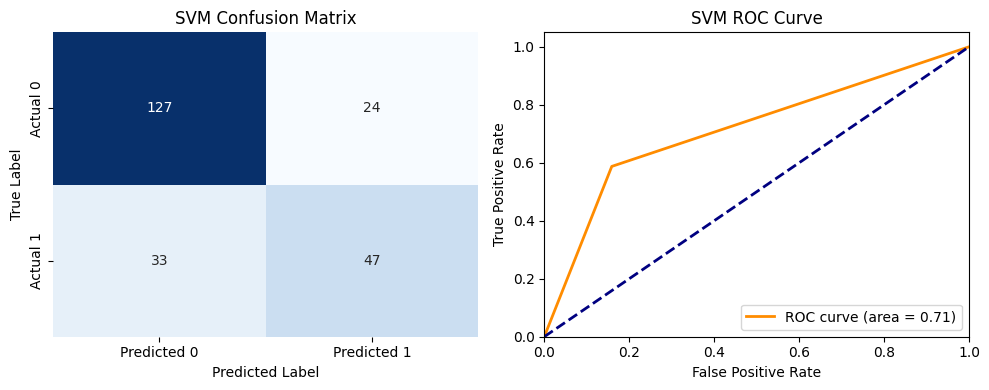


MLP ROC AUC Score: 0.7264072847682119
SVM ROC AUC Score: 0.7142798013245033


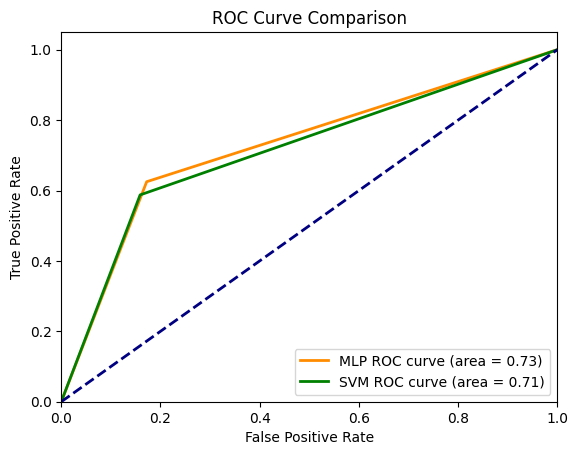


MLP Accuracy: 0.7575757575757576
SVM Accuracy: 0.7532467532467533

MLP Sensitivity (Recall): 0.625
SVM Sensitivity (Recall): 0.5875

MLP Specificity: 0.8278145695364238
SVM Specificity: 0.8410596026490066

MLP ROC AUC Score: 0.7264072847682119
SVM ROC AUC Score: 0.7142798013245033


In [ ]:
# K-En Yakın Komşuluk Sınıflandırıcısı için K değerlerini belirleme

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix ve ROC eğrisi oluşturma fonksiyonu
def evaluate_classifier(classifier, X_test, y_test, title):
    # Confusion matrix
    y_pred = classifier.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title + ' Confusion Matrix')

    # ROC eğrisi
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' ROC Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# MLP sınıflandırıcısı için değerlendirme
evaluate_classifier(mlp_classifier, X_test_normalized, y_test, 'MLP')

# SVM sınıflandırıcısı için değerlendirme
evaluate_classifier(svm_classifier, X_test_normalized, y_test, 'SVM')


# KARŞILAİTIRMA

# MLP ve SVM sınıflandırıcıları için değerlendirme
mlp_conf_matrix = confusion_matrix(y_test, mlp_classifier.predict(X_test_normalized))
svm_conf_matrix = confusion_matrix(y_test, svm_classifier.predict(X_test_normalized))

# ROC AUC
mlp_roc_auc = roc_auc_score(y_test, mlp_classifier.predict(X_test_normalized))
svm_roc_auc = roc_auc_score(y_test, svm_classifier.predict(X_test_normalized))

# ROC Değerini Karşılaştırma
print("\nMLP ROC AUC Score:", mlp_roc_auc)
print("SVM ROC AUC Score:", svm_roc_auc)

# ROC eğrileriyle karşılaştırma
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_classifier.predict(X_test_normalized))
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_classifier.predict(X_test_normalized))

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='MLP ROC curve (area = %0.2f)' % mlp_roc_auc)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


# Accuracy değerleri
mlp_accuracy = mlp_conf_matrix.diagonal().sum() / mlp_conf_matrix.sum()
svm_accuracy = svm_conf_matrix.diagonal().sum() / svm_conf_matrix.sum()

# Sensitivity (Recall) değerleri
mlp_sensitivity = mlp_conf_matrix[1, 1] / (mlp_conf_matrix[1, 1] + mlp_conf_matrix[1, 0])
svm_sensitivity = svm_conf_matrix[1, 1] / (svm_conf_matrix[1, 1] + svm_conf_matrix[1, 0])

# Specificity değerleri
mlp_specificity = mlp_conf_matrix[0, 0] / (mlp_conf_matrix[0, 0] + mlp_conf_matrix[0, 1])
svm_specificity = svm_conf_matrix[0, 0] / (svm_conf_matrix[0, 0] + svm_conf_matrix[0, 1])

# ROC AUC değerleri zaten hesaplanmıştı

# Metrikler
print("\nMLP Accuracy:", mlp_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("\nMLP Sensitivity (Recall):", mlp_sensitivity)
print("SVM Sensitivity (Recall):", svm_sensitivity)
print("\nMLP Specificity:", mlp_specificity)
print("SVM Specificity:", svm_specificity)
print("\nMLP ROC AUC Score:", mlp_roc_auc)
print("SVM ROC AUC Score:", svm_roc_auc)
